In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\KAJAL-KUMARI\Downloads\Indian-Resturants.csv")

In [3]:
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [94]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

# Columns Type

## Numarical : average_cost_for_two, price_range, votes, photo_count (4)

## categorical : establishment, city, city_id, locality, zipcode, country_id, locality_verbose, cuisines, currency, highlights, aggregate_rating, rating_text, opentable_support, delivery, takeaway (15)

## Mixed : name ,res_id, url, address, timings (5)

# Univariate Analysis

## Numerical Columns

### average_cost_for_two

#### Conclusion : 

The average_cost_for_two feature is highly right-skewed, indicating most restaurants are affordable, with a few high-end options creating outliers.

In [6]:
df.average_cost_for_two.describe()

count    211944.000000
mean        595.812229
std         606.239363
min           0.000000
25%         250.000000
50%         400.000000
75%         700.000000
max       30000.000000
Name: average_cost_for_two, dtype: float64

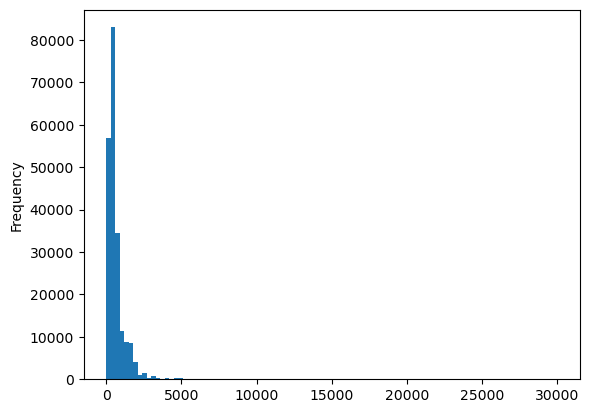

In [7]:
df['average_cost_for_two'].plot(kind='hist',bins=100)
plt.show()

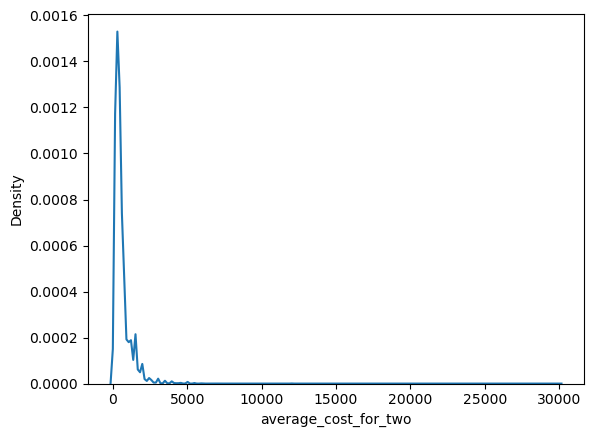

In [8]:
sns.kdeplot(df['average_cost_for_two'])
plt.show()

In [9]:
print(df.average_cost_for_two.skew())

5.4917440859453315


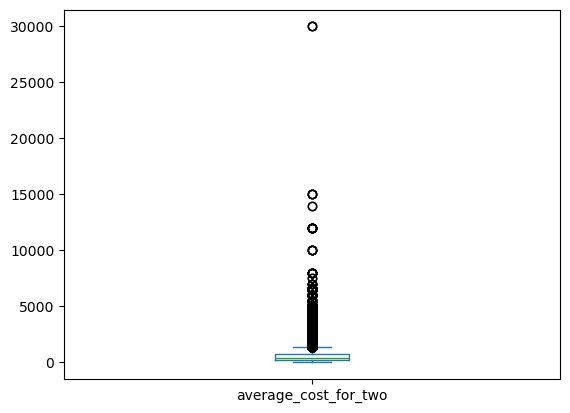

In [10]:
df['average_cost_for_two'].plot(kind='box')
plt.show()

## Feature Engineering

. Removing outliers from column average_cost_for_two

In [11]:
Q1 = df['average_cost_for_two'].quantile(0.25)
Q3 = df['average_cost_for_two'].quantile(0.75)

In [12]:
IQR = Q3 - Q1

In [13]:
dft = df[~((df['average_cost_for_two'] < (Q1 - 1.5 * IQR)) | 
           (df['average_cost_for_two'] > (Q3 + 1.5 * IQR)))]

In [14]:
dft

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [15]:
Q1 = dft['votes'].quantile(0.25)
Q3 = dft['votes'].quantile(0.75)

In [16]:
IQR = Q3 - Q1

In [17]:
IQR

281.0

In [18]:
df = dft[~((dft['votes'] < (Q1 - 1.5 * IQR)) | 
           (dft['votes'] > (Q3 + 1.5 * IQR)))]

In [19]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
5,3400275,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-civi...,"114/23 G, Deep Shikha Complex, Sanjay Place, C...",Agra,34,Civil Lines,27.201516,78.007556,...,2,Rs.,"['Credit Card', 'Lunch', 'Delivery', 'Dinner',...",4.0,Very Good,707,62,0.0,-1,-1
6,3400296,Honeydew Restaurant,['Quick Bites'],https://www.zomato.com/agra/honeydew-restauran...,"Opposite Soami Bagh Temple, Dayal Bagh, Agra",Agra,34,Dayal Bagh,27.222175,78.010174,...,2,Rs.,"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea...",4.2,Very Good,647,46,0.0,1,-1
7,3400368,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-sika...,"Plot C-1/6, Sector 13, Sikandra, Agra",Agra,34,Sikandra,27.203930,77.954260,...,2,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...",3.8,Good,617,18,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [20]:
Q1 = df['photo_count'].quantile(0.25)
Q3 = df['photo_count'].quantile(0.75)

In [21]:
IQR = Q3 - Q1

In [22]:
IQR

46.0

In [23]:
dft = df[~((df['photo_count'] < (Q1 - 1.5 * IQR)) | 
           (df['photo_count'] > (Q3 + 1.5 * IQR)))]

In [24]:
dft

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
5,3400275,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-civi...,"114/23 G, Deep Shikha Complex, Sanjay Place, C...",Agra,34,Civil Lines,27.201516,78.007556,...,2,Rs.,"['Credit Card', 'Lunch', 'Delivery', 'Dinner',...",4.0,Very Good,707,62,0.0,-1,-1
6,3400296,Honeydew Restaurant,['Quick Bites'],https://www.zomato.com/agra/honeydew-restauran...,"Opposite Soami Bagh Temple, Dayal Bagh, Agra",Agra,34,Dayal Bagh,27.222175,78.010174,...,2,Rs.,"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea...",4.2,Very Good,647,46,0.0,1,-1
7,3400368,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-sika...,"Plot C-1/6, Sector 13, Sikandra, Agra",Agra,34,Sikandra,27.203930,77.954260,...,2,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...",3.8,Good,617,18,0.0,-1,-1
8,3401284,Cake House,['Bakery'],https://www.zomato.com/agra/cake-house-2-civil...,"23/301, Wazirpura Rd, Judge Compound Chowraha,...",Agra,34,Civil Lines,27.204148,78.009025,...,2,Rs.,"['Takeaway Available', 'Cash', 'Indoor Seating...",3.4,Average,322,14,0.0,1,-1
12,3400105,Pizza Hut,['Casual Dining'],https://www.zomato.com/agra/pizza-hut-tajganj?...,"8, Handicraft Nagar, Fatehabad Road, Tajganj, ...",Agra,34,Tajganj,27.161372,78.034900,...,2,Rs.,"['Serves Alcohol', 'Cash', 'Takeaway Available...",4.1,Very Good,626,99,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [25]:
dft.average_cost_for_two.isnull().sum()

0

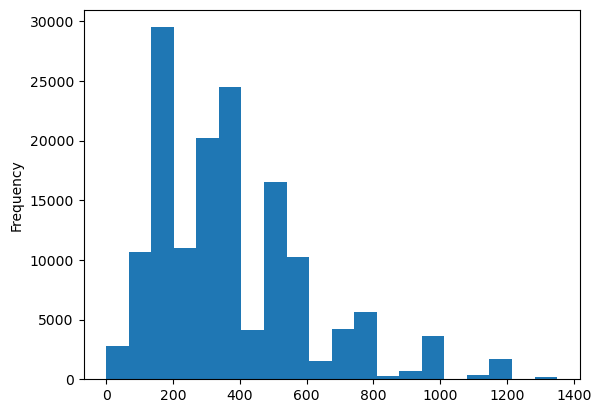

In [26]:
dft['average_cost_for_two'].plot(kind='hist',bins=20)
plt.show()

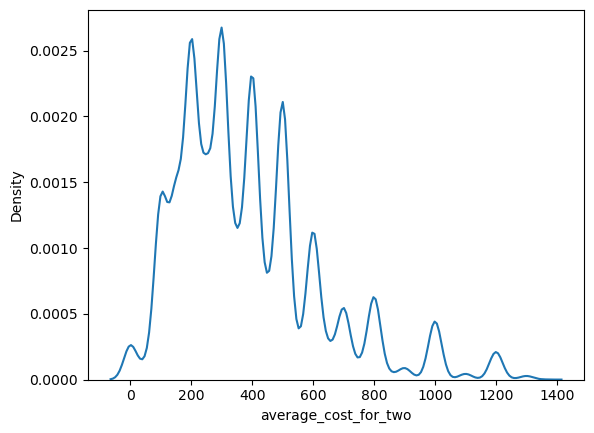

In [27]:
sns.kdeplot(dft['average_cost_for_two'])
plt.show()

In [28]:
print(dft.average_cost_for_two.skew())

1.1709673664478324


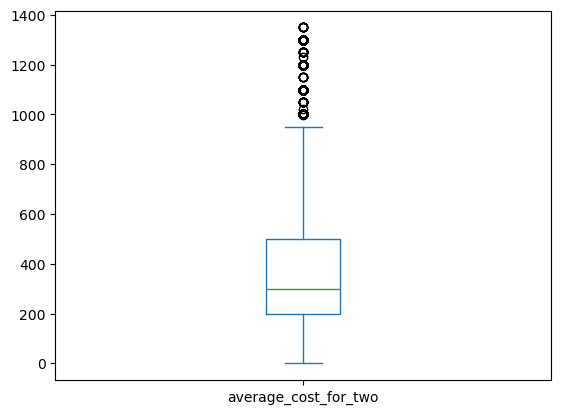

In [29]:
dft['average_cost_for_two'].plot(kind='box')
plt.show()

## price_range

In [30]:
dft.price_range.describe()

count    147779.000000
mean          1.579940
std           0.672736
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: price_range, dtype: float64

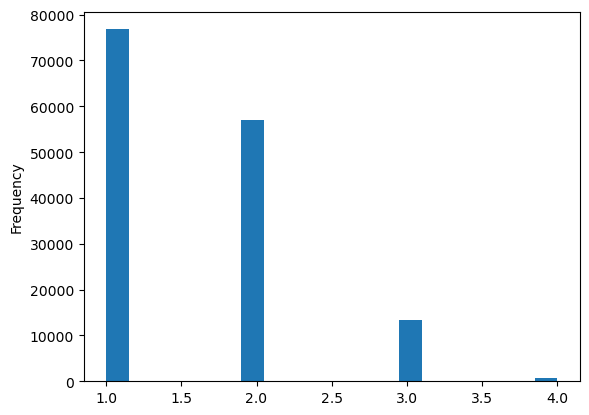

In [31]:
dft['price_range'].plot(kind='hist',bins=20)
plt.show()

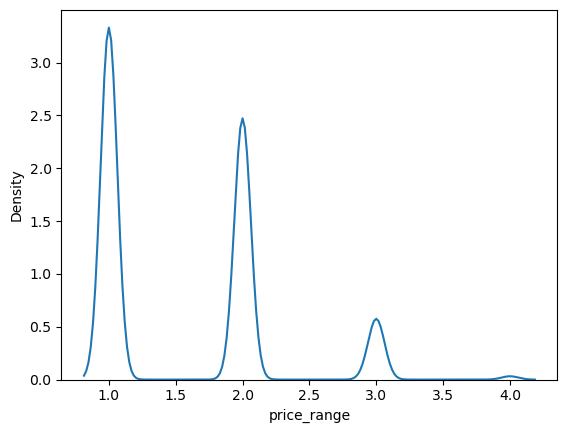

In [32]:
sns.kdeplot(dft['price_range'])
plt.show()

In [33]:
print(dft.price_range.skew())

0.8336681023981991


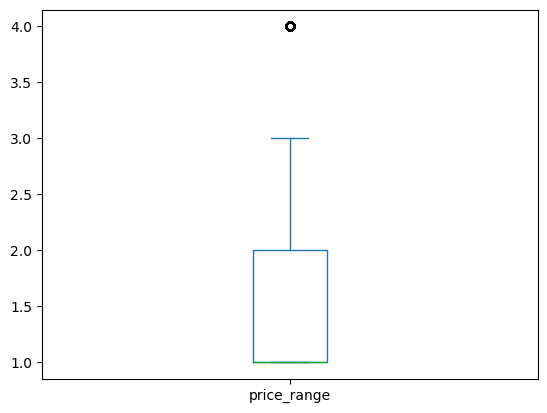

In [34]:
dft['price_range'].plot(kind='box')
plt.show()

### votes

In [35]:
dft.votes.describe()

count    147779.000000
mean         99.357737
std         137.282145
min         -18.000000
25%           7.000000
50%          41.000000
75%         135.000000
max         715.000000
Name: votes, dtype: float64

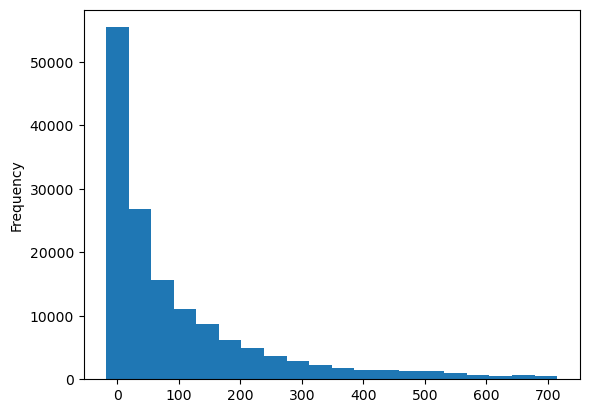

In [36]:
dft['votes'].plot(kind='hist',bins=20)
plt.show()

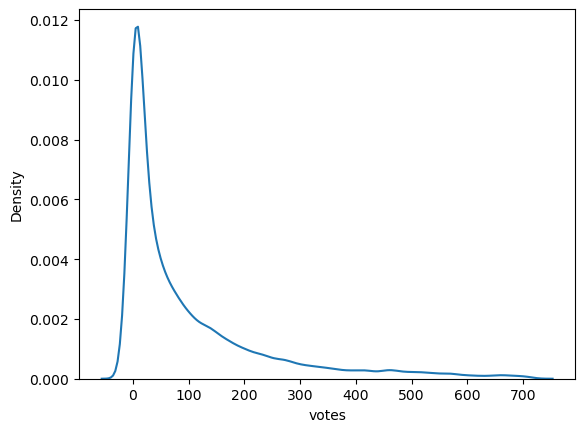

In [37]:
sns.kdeplot(dft['votes'])
plt.show()

In [38]:
print(dft.votes.skew())

2.0352258075628304


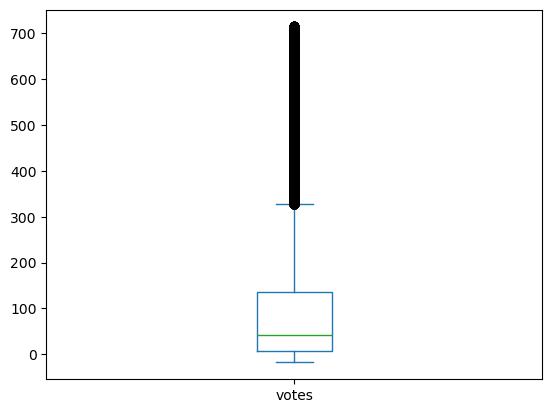

In [39]:
dft['votes'].plot(kind='box')
plt.show()

#### . After Feature Engineering

In [40]:
df.votes.describe()

count    171990.000000
mean        135.584284
std         168.894107
min         -18.000000
25%          10.000000
50%          63.000000
75%         200.000000
max         715.000000
Name: votes, dtype: float64

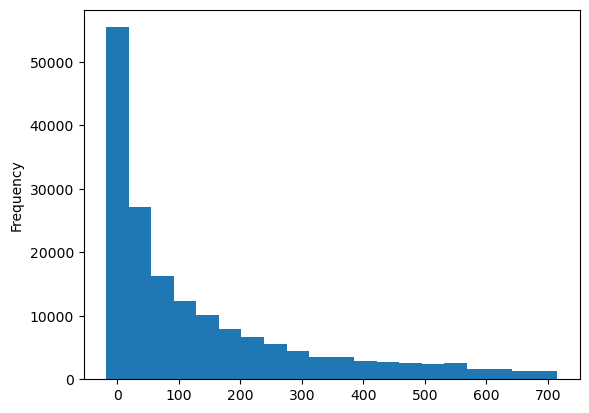

In [41]:
df['votes'].plot(kind='hist',bins=20)
plt.show()

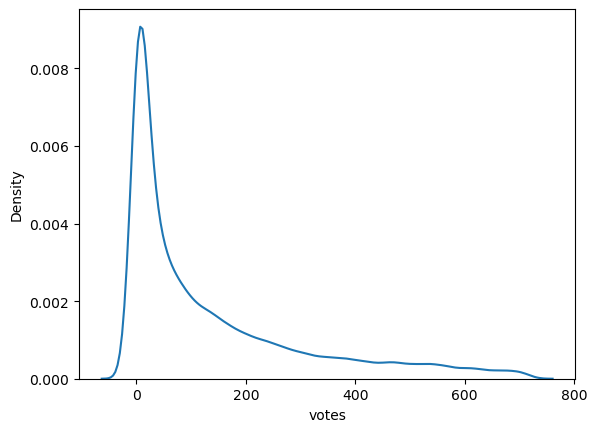

In [42]:
sns.kdeplot(df['votes'])
plt.show()

In [43]:
print(df.votes.skew())

1.5123903923974338


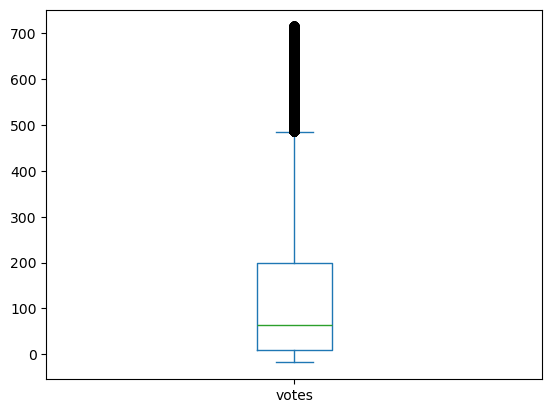

In [44]:
df['votes'].plot(kind='box')
plt.show()

### photo_count

In [45]:
df.photo_count.describe()

count    171990.000000
mean         60.776516
std         139.518099
min           0.000000
25%           2.000000
50%          11.000000
75%          48.000000
max        2944.000000
Name: photo_count, dtype: float64

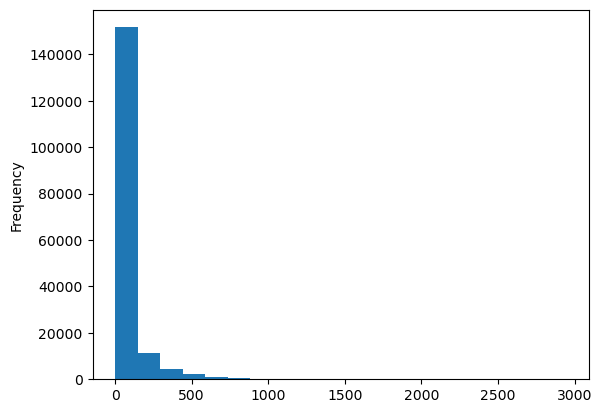

In [46]:
df['photo_count'].plot(kind='hist',bins=20)
plt.show()

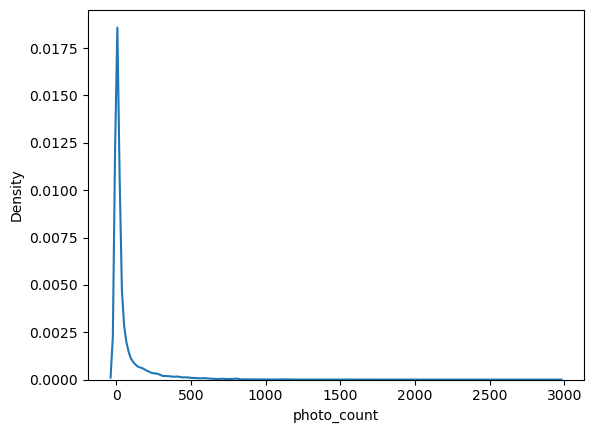

In [47]:
sns.kdeplot(df['photo_count'])
plt.show()

In [48]:
print(df.photo_count.skew())

5.096482923215122


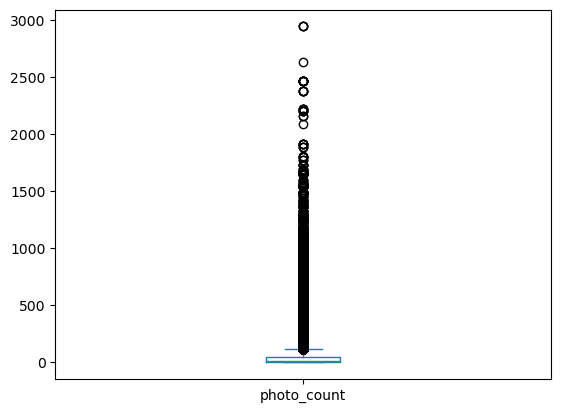

In [49]:
df['photo_count'].plot(kind='box')
plt.show()

#### . After Feature engineering

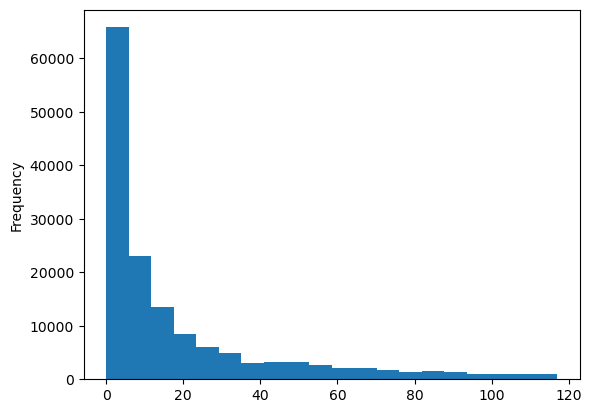

In [50]:
dft['photo_count'].plot(kind='hist',bins=20)
plt.show()

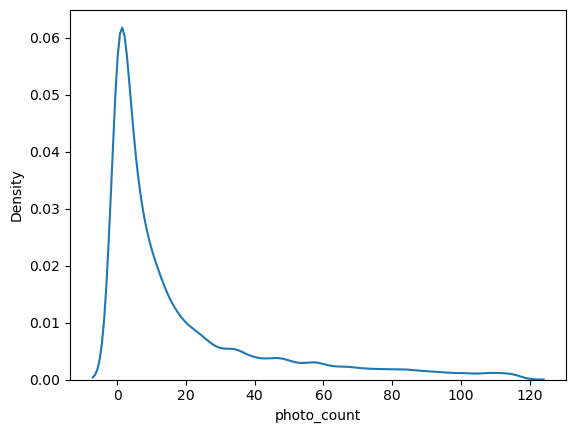

In [51]:
sns.kdeplot(dft['photo_count'])
plt.show()

In [52]:
print(dft.photo_count.skew())

1.8945507849997678


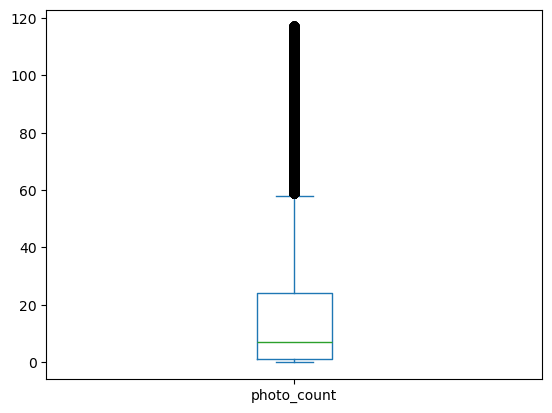

In [53]:
dft['photo_count'].plot(kind='box')
plt.show()

## Categorical Columns

In [54]:
dft.establishment.info()

<class 'pandas.core.series.Series'>
Index: 147779 entries, 5 to 211943
Series name: establishment
Non-Null Count   Dtype 
--------------   ----- 
147779 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [55]:
df.establishment.isnull().sum()

0

In [56]:
dft.establishment.nunique()

27

In [57]:
dft.establishment.value_counts()

establishment
['Quick Bites']        55402
['Casual Dining']      36330
['Café']               13365
['Bakery']              6769
['Dessert Parlour']     6078
['Sweet Shop']          5270
['Beverage Shop']       5150
[]                      3993
['Dhaba']               2628
['Food Court']          2435
['Bar']                 2235
['Kiosk']               1780
['Bhojanalya']          1400
['Food Truck']          1236
['Fine Dining']         1157
['Lounge']               651
['Mess']                 581
['Paan Shop']            507
['Confectionery']        302
['Pub']                  178
['Butcher Shop']         168
['Club']                  67
['Shack']                 44
['Microbrewery']          17
['Cocktail Bar']          16
['Irani Cafe']            14
['Pop up']                 6
Name: count, dtype: int64

In [58]:
dft.establishment.value_counts()/len(df.establishment)*100

establishment
['Quick Bites']        32.212338
['Casual Dining']      21.123321
['Café']                7.770801
['Bakery']              3.935694
['Dessert Parlour']     3.533926
['Sweet Shop']          3.064132
['Beverage Shop']       2.994360
[]                      2.321647
['Dhaba']               1.527996
['Food Court']          1.415780
['Bar']                 1.299494
['Kiosk']               1.034944
['Bhojanalya']          0.814001
['Food Truck']          0.718646
['Fine Dining']         0.672714
['Lounge']              0.378510
['Mess']                0.337810
['Paan Shop']           0.294785
['Confectionery']       0.175592
['Pub']                 0.103494
['Butcher Shop']        0.097680
['Club']                0.038956
['Shack']               0.025583
['Microbrewery']        0.009884
['Cocktail Bar']        0.009303
['Irani Cafe']          0.008140
['Pop up']              0.003489
Name: count, dtype: float64

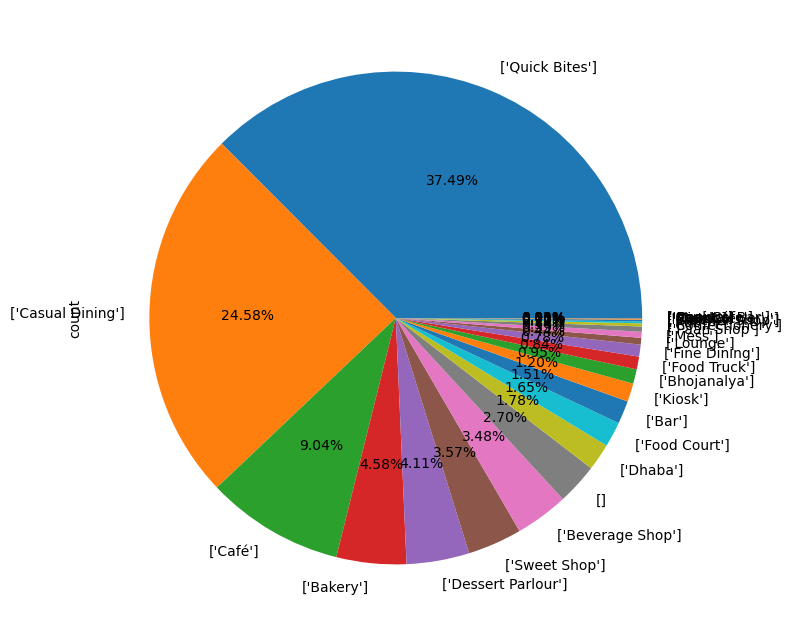

In [59]:
plt.figure(figsize=(12,8))
dft.establishment.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

### city

In [60]:
df.city.info()

<class 'pandas.core.series.Series'>
Index: 171990 entries, 3 to 211943
Series name: city
Non-Null Count   Dtype 
--------------   ----- 
171990 non-null  object
dtypes: object(1)
memory usage: 2.6+ MB


In [61]:
df.city.isnull().sum()

0

In [62]:
dft.city.nunique()

99

In [63]:
dft.city.value_counts()

city
Chennai          3971
Jabalpur         3918
Ajmer            3246
Jammu            2373
Raipur           2331
                 ... 
Ghaziabad          64
Howrah             46
Secunderabad       36
Greater Noida      27
Nayagaon           15
Name: count, Length: 99, dtype: int64

In [64]:
dft.city.value_counts()/len(df.city)*100

city
Chennai          2.308855
Jabalpur         2.278039
Ajmer            1.887319
Jammu            1.379731
Raipur           1.355311
                   ...   
Ghaziabad        0.037211
Howrah           0.026746
Secunderabad     0.020931
Greater Noida    0.015699
Nayagaon         0.008721
Name: count, Length: 99, dtype: float64

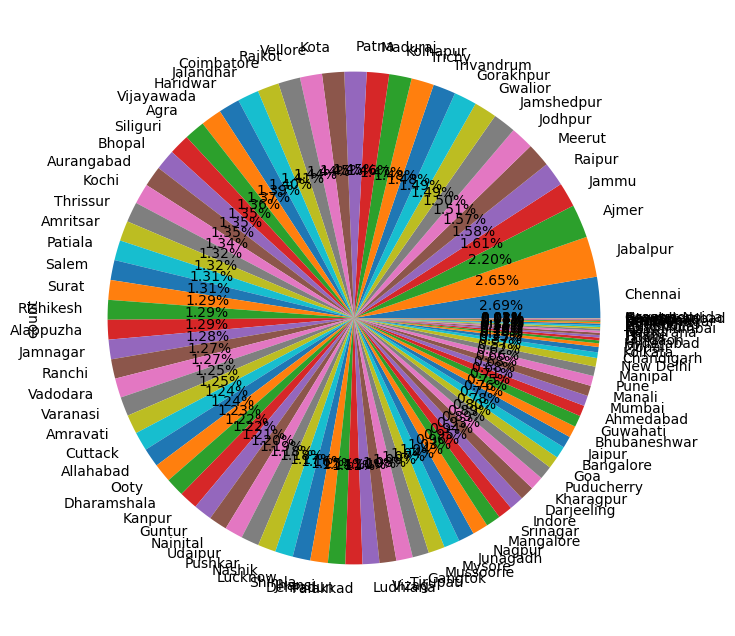

In [65]:
plt.figure(figsize=(12,8))
dft.city.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

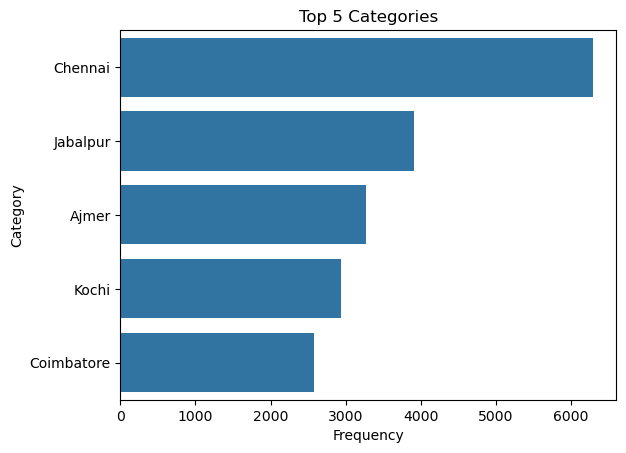

In [66]:
top_n = df.city.value_counts().nlargest(5)
sns.barplot(x=top_n.values, y=top_n.index)
plt.title("Top 5 Categories")
plt.xlabel("Frequency")
plt.ylabel("Category")
plt.show()

### city_id

In [67]:
df.city_id.info()

<class 'pandas.core.series.Series'>
Index: 171990 entries, 3 to 211943
Series name: city_id
Non-Null Count   Dtype
--------------   -----
171990 non-null  int64
dtypes: int64(1)
memory usage: 2.6 MB


In [68]:
df.city_id.isnull().sum()

0

In [69]:
dft.city_id.nunique()

83

In [70]:
dft.city_id.value_counts()

city_id
7        3971
11336    3918
11303    3246
11307    2373
11310    2331
         ... 
11308    1002
5         973
2         568
6         318
11079     194
Name: count, Length: 83, dtype: int64

In [71]:
dft.city_id.value_counts()/len(df.city_id)*100

city_id
7        2.308855
11336    2.278039
11303    1.887319
11307    1.379731
11310    1.355311
           ...   
11308    0.582592
5        0.565731
2        0.330252
6        0.184894
11079    0.112797
Name: count, Length: 83, dtype: float64

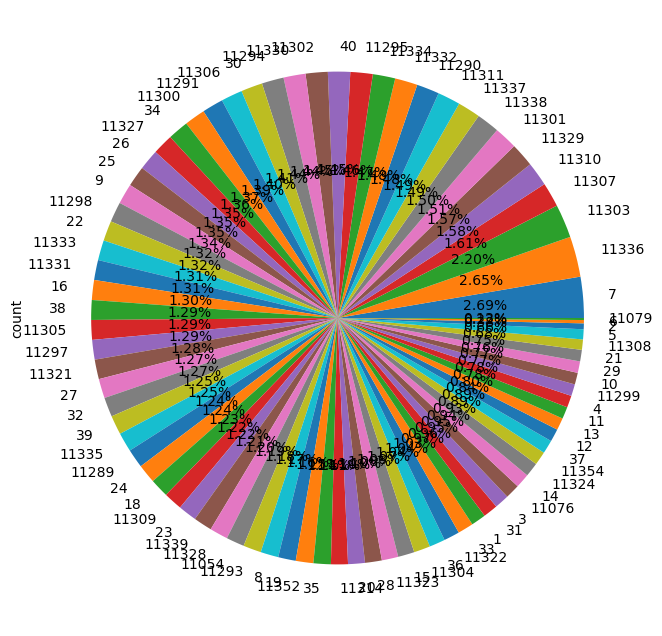

In [72]:
plt.figure(figsize=(12,8))
dft.city_id.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

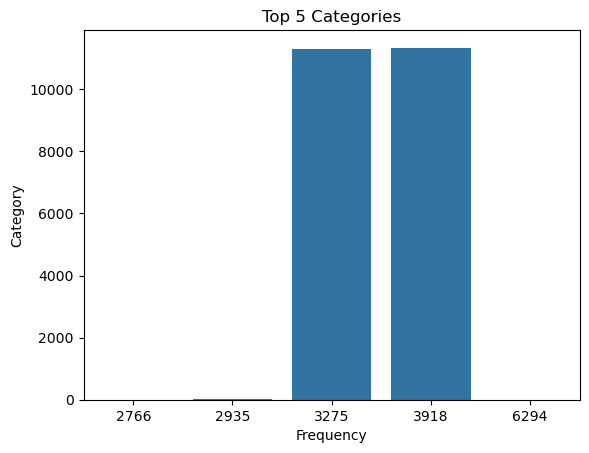

In [73]:
top_5 = df.city_id.value_counts().nlargest(5)
sns.barplot(x=top_5.values, y=top_5.index)
plt.title("Top 5 Categories")
plt.xlabel("Frequency")
plt.ylabel("Category")
plt.show()

### locality

In [74]:
df.locality.info()

<class 'pandas.core.series.Series'>
Index: 171990 entries, 3 to 211943
Series name: locality
Non-Null Count   Dtype 
--------------   ----- 
171990 non-null  object
dtypes: object(1)
memory usage: 2.6+ MB


In [75]:
df.locality.isnull().sum()

0

In [76]:
dft.locality.nunique()

2899

In [77]:
dft.locality.value_counts()

locality
Civil Lines                               2941
Model Town                                1836
Ana Sagar Lake                            1729
Tirumala                                  1433
Napier Town                               1351
                                          ... 
Barakhamba Road                              1
Hotel Residency, Maharana Pratap Nagar       1
Sector 7, Dwarka                             1
Andul Road                                   1
The Fern Hotel, Tonk Road                    1
Name: count, Length: 2899, dtype: int64

In [78]:
dft.locality.value_counts()/len(df.city_id)*100

locality
Civil Lines                               1.709983
Model Town                                1.067504
Ana Sagar Lake                            1.005291
Tirumala                                  0.833188
Napier Town                               0.785511
                                            ...   
Barakhamba Road                           0.000581
Hotel Residency, Maharana Pratap Nagar    0.000581
Sector 7, Dwarka                          0.000581
Andul Road                                0.000581
The Fern Hotel, Tonk Road                 0.000581
Name: count, Length: 2899, dtype: float64

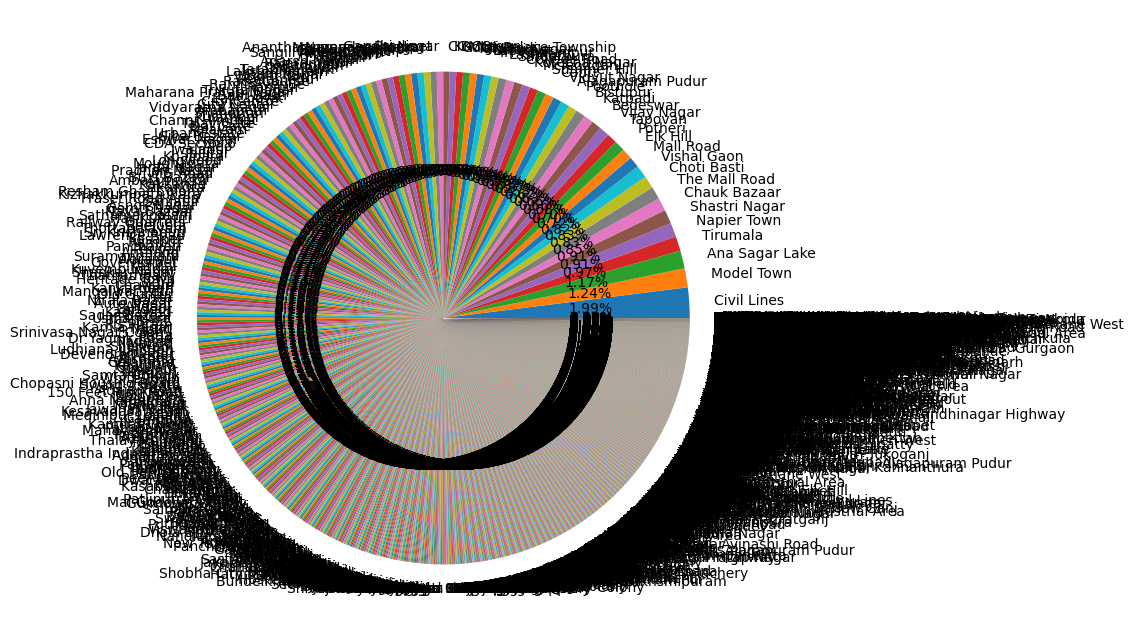

In [79]:
plt.figure(figsize=(12,8))
dft.locality.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

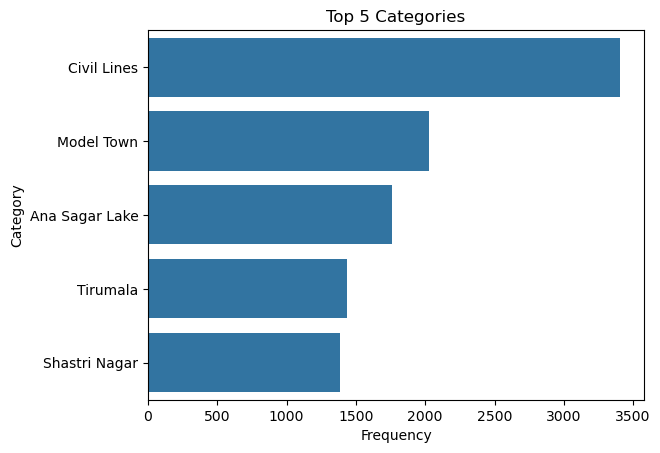

In [80]:
top_5 = df.locality.value_counts().nlargest(5)
sns.barplot(x=top_5.values, y=top_5.index)
plt.title("Top 5 Categories")
plt.xlabel("Frequency")
plt.ylabel("Category")
plt.show()

### Zipcode

In [81]:
df.zipcode.info()

<class 'pandas.core.series.Series'>
Index: 171990 entries, 3 to 211943
Series name: zipcode
Non-Null Count  Dtype 
--------------  ----- 
31002 non-null  object
dtypes: object(1)
memory usage: 2.6+ MB


In [82]:
df.zipcode.isnull().sum()

140988

In [83]:
!pip install geopy

 ### country_id

In [84]:
df.country_id.info()

<class 'pandas.core.series.Series'>
Index: 171990 entries, 3 to 211943
Series name: country_id
Non-Null Count   Dtype
--------------   -----
171990 non-null  int64
dtypes: int64(1)
memory usage: 2.6 MB


In [85]:
df.country_id.isnull().sum()

0

In [86]:
dft.country_id.nunique()

1

In [87]:
dft.country_id.value_counts()

country_id
1    147779
Name: count, dtype: int64

### cuisines

In [88]:
df.cuisines.info()

<class 'pandas.core.series.Series'>
Index: 171990 entries, 3 to 211943
Series name: cuisines
Non-Null Count   Dtype 
--------------   ----- 
170613 non-null  object
dtypes: object(1)
memory usage: 2.6+ MB


In [89]:
df.cuisines.isnull().sum()

1377

In [90]:
dft.cuisines.nunique()

5971

In [91]:
dft.cuisines.value_counts()

cuisines
North Indian                                                                       13703
Fast Food                                                                           6302
North Indian, Chinese                                                               4777
Cafe                                                                                4727
South Indian                                                                        4455
                                                                                   ...  
Awadhi                                                                                 1
North Indian, BBQ, Chinese                                                             1
Beverages, Biryani, North Indian, Street Food, Chinese, Momos, Sandwich, Burger        1
Continental, Burger, Fast Food, Desserts                                               1
North Indian, Lucknowi, Chinese                                                        1
Name: count,

In [93]:
dft.cuisines.value_counts()/len(df.cuisines)*100

cuisines
North Indian                                                                       7.967324
Fast Food                                                                          3.664167
North Indian, Chinese                                                              2.777487
Cafe                                                                               2.748416
South Indian                                                                       2.590267
                                                                                     ...   
Awadhi                                                                             0.000581
North Indian, BBQ, Chinese                                                         0.000581
Beverages, Biryani, North Indian, Street Food, Chinese, Momos, Sandwich, Burger    0.000581
Continental, Burger, Fast Food, Desserts                                           0.000581
North Indian, Lucknowi, Chinese                                        

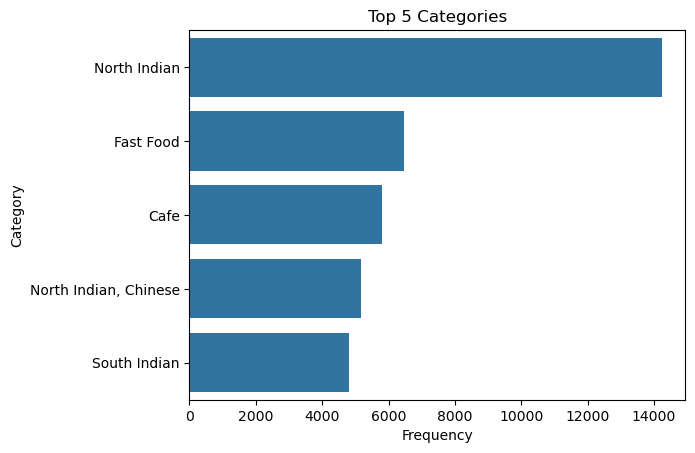

In [92]:
top_5 = df.cuisines.value_counts().nlargest(5)
sns.barplot(x=top_5.values, y=top_5.index)
plt.title("Top 5 Categories")
plt.xlabel("Frequency")
plt.ylabel("Category")
plt.show()

### highlights

In [95]:
df.highlights.info()

<class 'pandas.core.series.Series'>
Index: 171990 entries, 3 to 211943
Series name: highlights
Non-Null Count   Dtype 
--------------   ----- 
171990 non-null  object
dtypes: object(1)
memory usage: 2.6+ MB


In [96]:
df.highlights.isnull().sum()

0

In [97]:
dft.highlights.nunique()

21036

In [98]:
dft.highlights.value_counts()

highlights
['Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']                                                     3238
['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takeaway Available', 'Indoor Seating']                                         2376
[]                                                                                                                      2060
['Lunch', 'Cash', 'Takeaway Available', 'No Alcohol Available', 'Dinner', 'Delivery', 'Indoor Seating']                 1044
['Cash']                                                                                                                 989
                                                                                                                        ... 
['No Alcohol Available', 'Dinner', 'Takeaway Available', 'No Seating Available', 'Cash', 'Credit Card']                    1
['Dinner', 'Credit Card', 'Delivery', 'Lunch', 'Cash', 'Debit Card', 'Outdoor Seating', 'Digital Payments Accepted

In [99]:
dft.highlights.value_counts()/len(df.cuisines)*100

highlights
['Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']                                                     1.882668
['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takeaway Available', 'Indoor Seating']                                         1.381476
[]                                                                                                                      1.197744
['Lunch', 'Cash', 'Takeaway Available', 'No Alcohol Available', 'Dinner', 'Delivery', 'Indoor Seating']                 0.607012
['Cash']                                                                                                                0.575033
                                                                                                                          ...   
['No Alcohol Available', 'Dinner', 'Takeaway Available', 'No Seating Available', 'Cash', 'Credit Card']                 0.000581
['Dinner', 'Credit Card', 'Delivery', 'Lunch', 'Cash', 'Debit Card', 'Outdoor Seating'

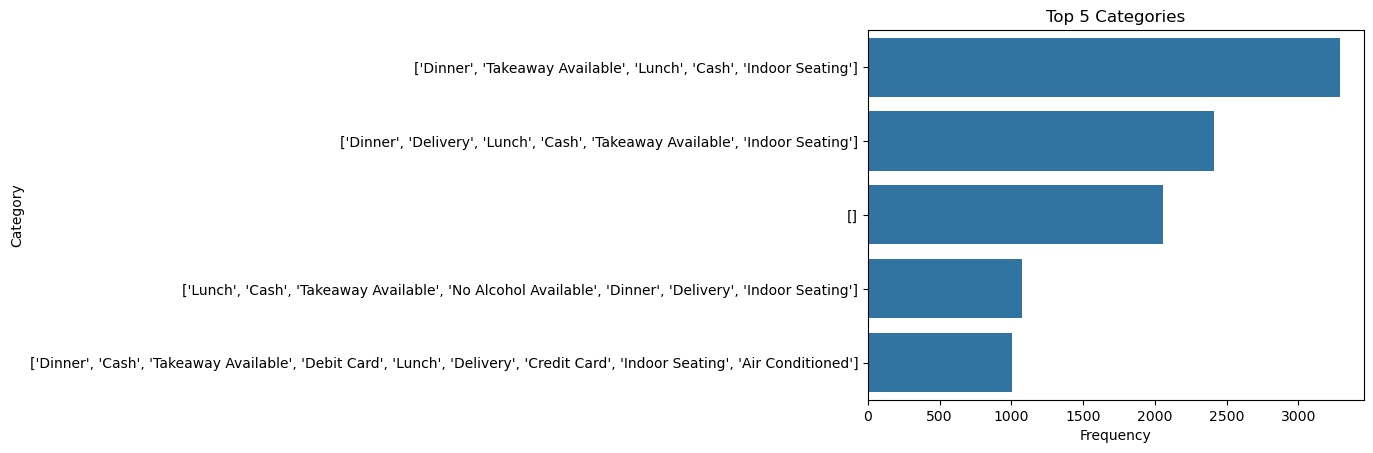

In [100]:
top_5 = df.highlights.value_counts().nlargest(5)
sns.barplot(x=top_5.values, y=top_5.index)
plt.title("Top 5 Categories")
plt.xlabel("Frequency")
plt.ylabel("Category")
plt.show()

### aggregate_rating

In [101]:
df.aggregate_rating.info()

<class 'pandas.core.series.Series'>
Index: 171990 entries, 3 to 211943
Series name: aggregate_rating
Non-Null Count   Dtype  
--------------   -----  
171990 non-null  float64
dtypes: float64(1)
memory usage: 2.6 MB


In [102]:
df.aggregate_rating.isnull().sum()

0

In [103]:
dft.aggregate_rating.nunique()

33

In [104]:
dft.aggregate_rating.value_counts()

aggregate_rating
0.0    22971
3.9    11493
3.8    11434
4.0    10766
3.7    10637
3.2    10336
3.6     9177
3.3     8769
3.5     8427
4.1     7957
3.4     7597
4.2     5182
4.3     3997
3.1     3098
3.0     2907
2.9     2530
2.8     2084
4.4     1823
2.7     1516
4.5     1328
2.6      929
2.5      631
4.6      564
2.4      531
4.7      355
2.3      325
4.8      157
2.2      105
4.9       91
2.1       42
2.0       10
1.9        6
1.8        4
Name: count, dtype: int64

In [105]:
dft.aggregate_rating.value_counts()/len(df.cuisines)*100

aggregate_rating
0.0    13.356009
3.9     6.682365
3.8     6.648061
4.0     6.259666
3.7     6.184662
3.2     6.009652
3.6     5.335775
3.3     5.098552
3.5     4.899703
4.1     4.626432
3.4     4.417117
4.2     3.012966
4.3     2.323972
3.1     1.801268
3.0     1.690215
2.9     1.471016
2.8     1.211698
4.4     1.059945
2.7     0.881447
4.5     0.772138
2.6     0.540148
2.5     0.366882
4.6     0.327926
2.4     0.308739
4.7     0.206407
2.3     0.188964
4.8     0.091284
2.2     0.061050
4.9     0.052910
2.1     0.024420
2.0     0.005814
1.9     0.003489
1.8     0.002326
Name: count, dtype: float64

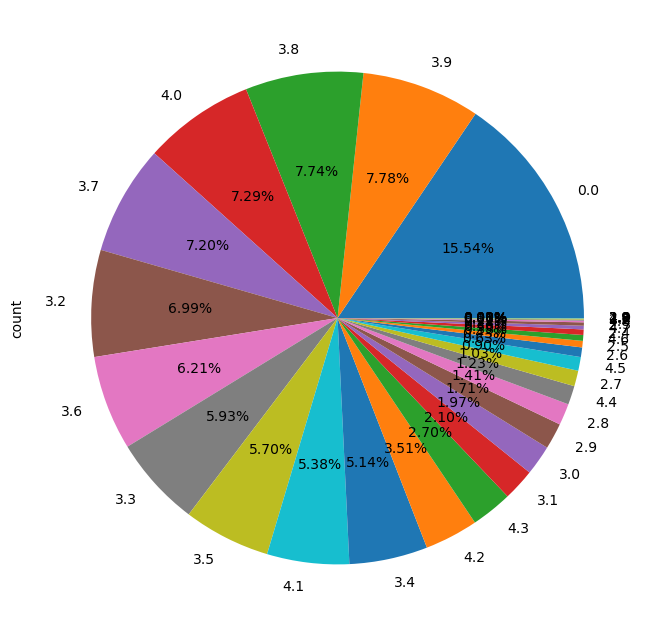

In [106]:
plt.figure(figsize=(12,8))
dft.aggregate_rating.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

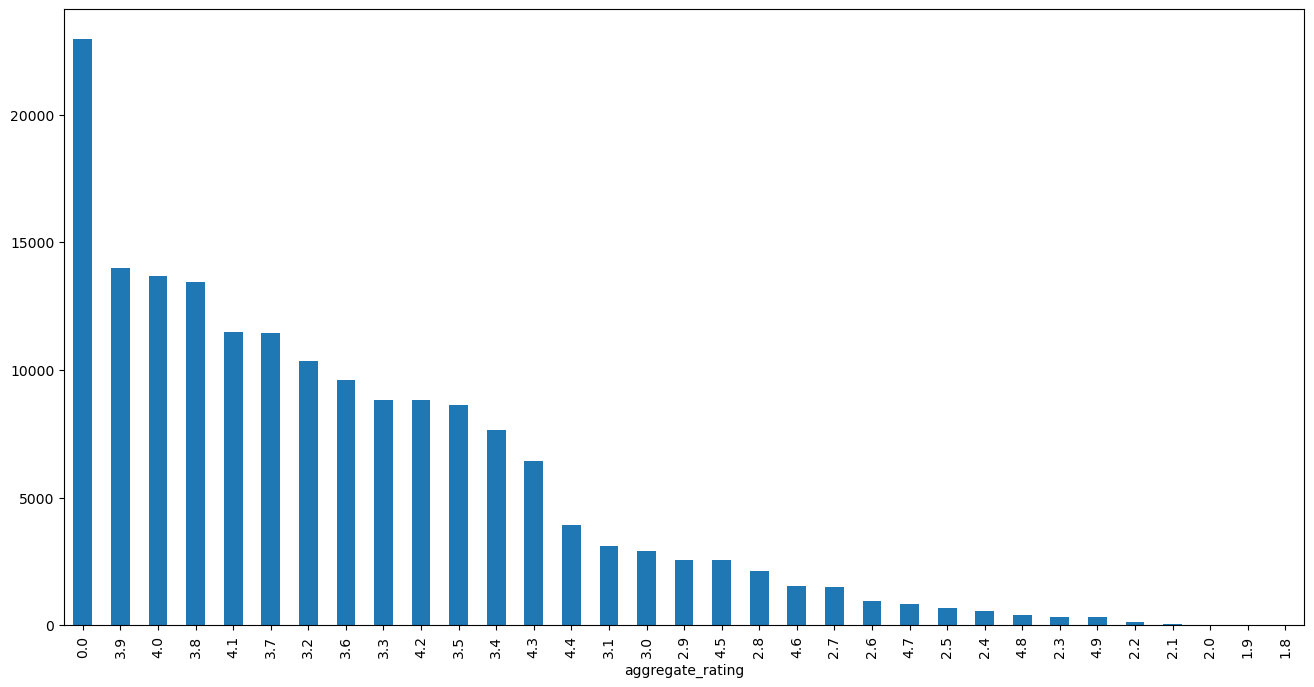

In [107]:
plt.figure(figsize=(16,8))
df.aggregate_rating.value_counts().plot(kind='bar')
plt.show()

### rating_text

In [108]:
df.rating_text.info()

<class 'pandas.core.series.Series'>
Index: 171990 entries, 3 to 211943
Series name: rating_text
Non-Null Count   Dtype 
--------------   ----- 
171990 non-null  object
dtypes: object(1)
memory usage: 2.6+ MB


In [109]:
df.rating_text.isnull().sum()

0

In [110]:
dft.rating_text.nunique()

37

In [111]:
dft.rating_text.value_counts()

rating_text
Good             51084
Average          40371
Very Good        29652
Not rated        22971
Excellent         2480
Poor              1023
Baik                17
Sangat Baik         17
Bom                 16
Bardzo dobrze       15
Çok iyi             13
İyi                 10
Buono               10
Dobré                9
Muito Bom            8
Skvělá volba         8
Veľmi dobré          8
Dobrze               7
Bueno                7
Excelente            6
Velmi dobré          6
Průměr               4
Média                4
Promedio             4
Media                3
Priemer              3
Skvělé               3
Muy Bueno            3
Średnio              3
Ortalama             3
Ottimo               2
Biasa                2
Wybitnie             2
Terbaik              2
Vynikajúce           1
Muito bom            1
Harika               1
Name: count, dtype: int64

In [112]:
dft.rating_text.value_counts()/len(df.cuisines)*100

rating_text
Good             29.701727
Average          23.472876
Very Good        17.240537
Not rated        13.356009
Excellent         1.441944
Poor              0.594802
Baik              0.009884
Sangat Baik       0.009884
Bom               0.009303
Bardzo dobrze     0.008721
Çok iyi           0.007559
İyi               0.005814
Buono             0.005814
Dobré             0.005233
Muito Bom         0.004651
Skvělá volba      0.004651
Veľmi dobré       0.004651
Dobrze            0.004070
Bueno             0.004070
Excelente         0.003489
Velmi dobré       0.003489
Průměr            0.002326
Média             0.002326
Promedio          0.002326
Media             0.001744
Priemer           0.001744
Skvělé            0.001744
Muy Bueno         0.001744
Średnio           0.001744
Ortalama          0.001744
Ottimo            0.001163
Biasa             0.001163
Wybitnie          0.001163
Terbaik           0.001163
Vynikajúce        0.000581
Muito bom         0.000581
Harika          

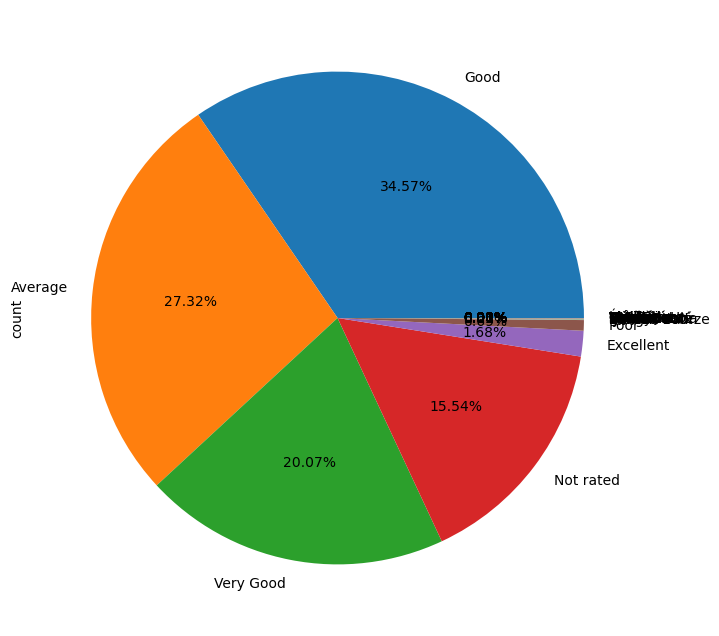

In [113]:
plt.figure(figsize=(12,8))
dft.rating_text.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

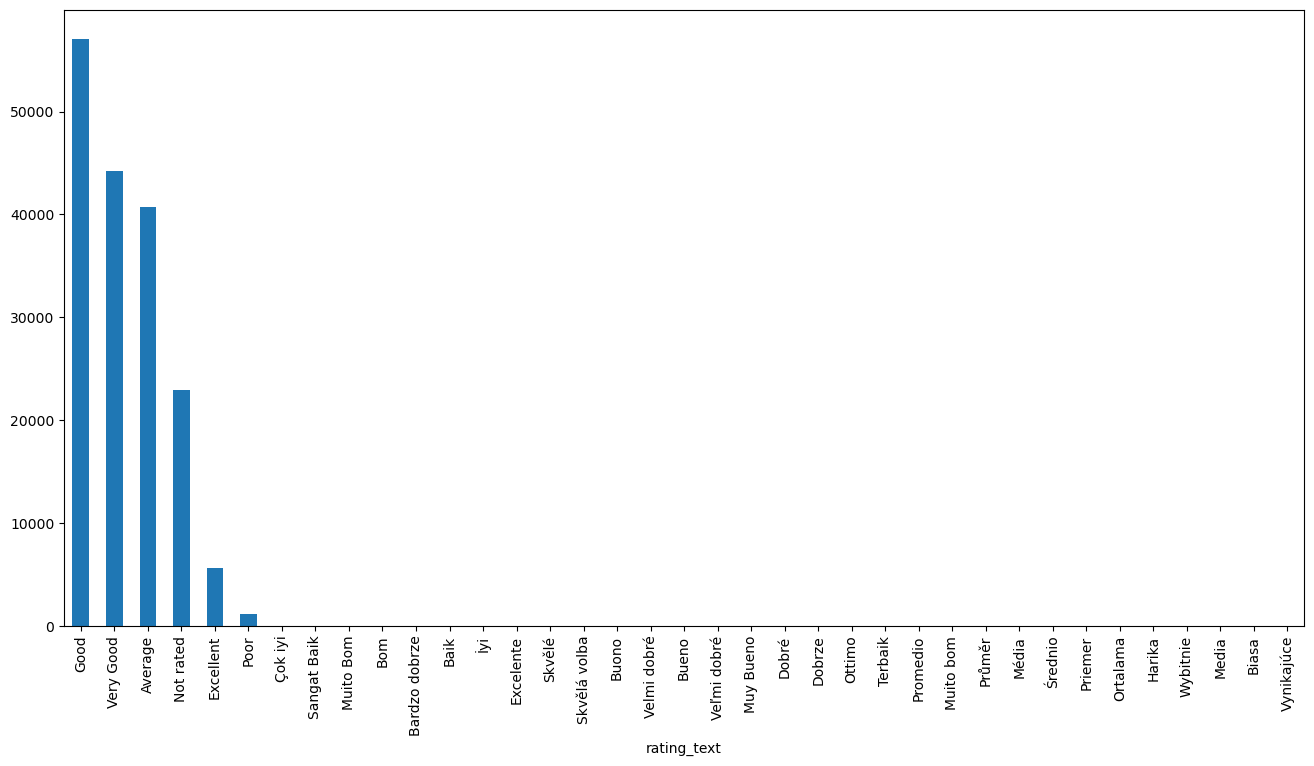

In [114]:
plt.figure(figsize=(16,8))
df.rating_text.value_counts().plot(kind='bar')
plt.show()

### opentable_support

In [115]:
df.opentable_support.info()

<class 'pandas.core.series.Series'>
Index: 171990 entries, 3 to 211943
Series name: opentable_support
Non-Null Count   Dtype  
--------------   -----  
171955 non-null  float64
dtypes: float64(1)
memory usage: 2.6 MB


In [116]:
df.opentable_support.isnull().sum()

35

In [117]:
dft.opentable_support.nunique()

1

In [118]:
dft.opentable_support.value_counts()

opentable_support
0.0    147752
Name: count, dtype: int64

In [119]:
dft.opentable_support.value_counts()/len(df.cuisines)*100

opentable_support
0.0    85.90732
Name: count, dtype: float64

### delivery

In [121]:
df.delivery.info()

<class 'pandas.core.series.Series'>
Index: 171990 entries, 3 to 211943
Series name: delivery
Non-Null Count   Dtype
--------------   -----
171990 non-null  int64
dtypes: int64(1)
memory usage: 2.6 MB


In [122]:
df.delivery.isnull().sum()

0

In [123]:
dft.delivery.nunique()

3

In [124]:
dft.delivery.value_counts()

delivery
-1    91717
 1    55227
 0      835
Name: count, dtype: int64

In [125]:
dft.delivery.value_counts()/len(df.cuisines)*100

delivery
-1    53.326938
 1    32.110588
 0     0.485493
Name: count, dtype: float64

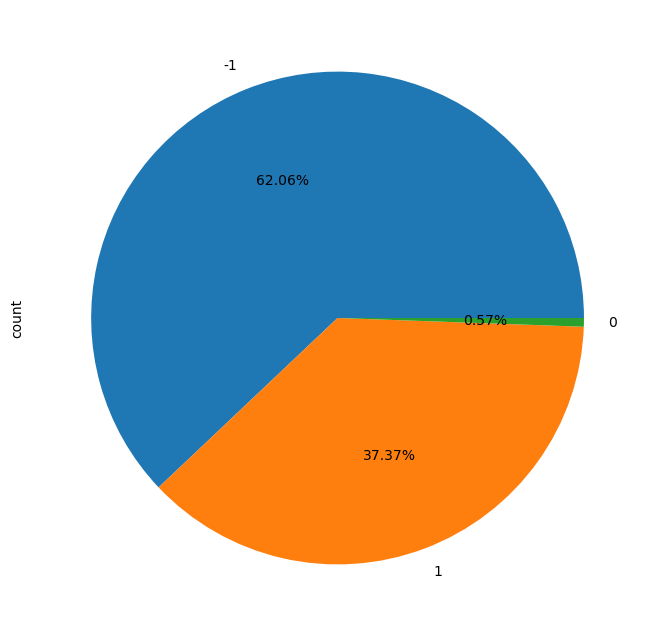

In [126]:
plt.figure(figsize=(12,8))
dft.delivery.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

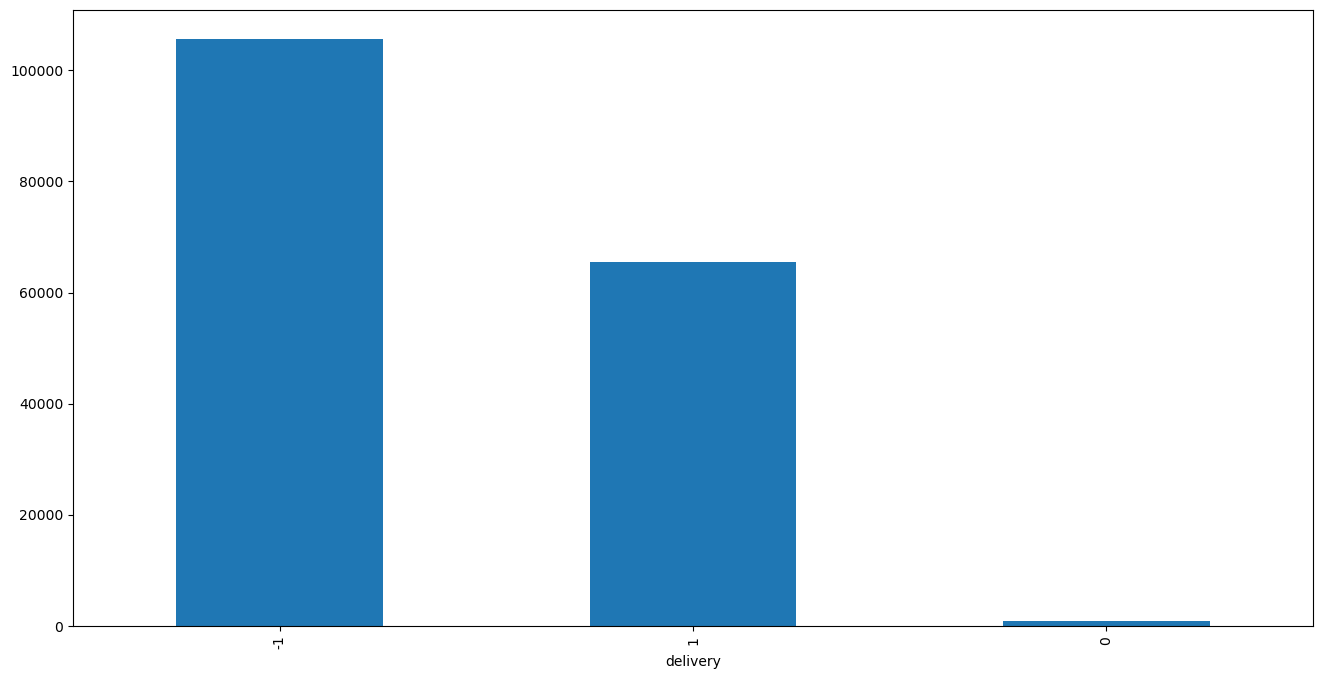

In [127]:
plt.figure(figsize=(16,8))
df.delivery.value_counts().plot(kind='bar')
plt.show()

### takeaway

In [128]:
df.takeaway.info()

<class 'pandas.core.series.Series'>
Index: 171990 entries, 3 to 211943
Series name: takeaway
Non-Null Count   Dtype
--------------   -----
171990 non-null  int64
dtypes: int64(1)
memory usage: 2.6 MB


In [129]:
df.takeaway.isnull().sum()

0

In [130]:
dft.takeaway.nunique()

1

In [131]:
dft.takeaway.value_counts()

takeaway
-1    147779
Name: count, dtype: int64

In [132]:
dft.takeaway.value_counts()/len(df.cuisines)*100

takeaway
-1    85.923019
Name: count, dtype: float64

# Final Coclusion : 

### 1. Cost Analysis
The average_cost_for_two feature is highly right-skewed, indicating most restaurants are affordable, with a few high-end options creating outliers.

Outliers were addressed using IQR-based filtering, which improved distribution for meaningful analysis.

### 2. Ratings Insights
The majority of restaurants have ratings between 3.0 and 4.5, with few receiving extreme ratings.

Higher-priced restaurants do not always correlate with higher ratings — suggesting service, cuisine variety, and experience play key roles in customer satisfaction.

### 3. Cuisines and Categories
Popular cuisines include North Indian, Chinese, and Fast Food, showing a demand for regional and quick-service meals.

Quick Bites and Casual Dining are the most common establishment types.

### 4. City-Wise Trends
Cities like Delhi NCR, Mumbai, and Bangalore dominate the dataset, reflecting major urban markets.

Average ratings vary by city, highlighting differences in restaurant quality and user expectations.

### 5. Service Availability
Features like delivery and takeaway show variation across restaurants and could be analyzed further for logistics or user behavior studies.